In [ ]:
# Peak detection and gaussian on the histogram of the image heights

# H
# |          =               
# |          = =            
# |  =     = = =              
# |  =     = = = =             
# |= =   = = = = =      =        
# |= = = = = = = = =  = = =         
# \ - - - - - - - - - - - - X



In [ ]:
# Identify the background
#   Generate mask
#   Estimate polynomial background
# Determine 1-D background offsets from the raw data within the mask
# Subtract the 1-D offsets from the raw data followed by a single masked background flattening.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [71]:
array = np.array([1, 2, 3, 4, 5], dtype=np.float64)
mask = array > 3
print(mask)
a2 = np.ma.masked_array(array, mask=mask, fill_value=np.nan).filled()
print(a2)

[False False False  True  True]
[ 1.  2.  3. nan nan]


In [4]:
# Median
def median_flattening(image: np.ndarray):
    for j in range(image.shape[0]):
        # Get the median of the row
        m = np.median(image[j, :])
        # print(m)
        image[j, :] -= m
    return image

# Median differences
def median_differences_flattening(image: np.ndarray):
    for j in range(image.shape[0]):
        if j > 0:
            median_height_diff_above = np.median(image[j, :] - image[j-1, :])
            # print(f'median difference in height: {median_height_diff_above}')
            image[j, :] -= median_height_diff_above
    return image

def add_ring(image: np.ndarray, outer_size: int = 200, inner_size: int = 100, centre: tuple = (0, 0), height: int = 10):
    cx = centre[0]
    cy = centre[1]
    for i in range(-outer_size, outer_size):
        for j in range(-outer_size, outer_size):
                if j+cy < image.shape[0] - 1:
                    if i+cx < image.shape[1] - 1:
                        if ((i)**2 + (j)**2) < outer_size**2 and i**2 + j**2 > inner_size**2:             
                            image[i+cx, j+cy] += height
    return image


def remove_plane_tilt(image: np.ndarray):
    # Get x-slope
    # Get median LHS x value
    x_lhs_median = np.median(image[:, 0])
    x_rhs_median = np.median(image[:, image.shape[1]-1])
    dx = (x_rhs_median - x_lhs_median) / (image.shape[1] - 1)
    print(f'avg x left: {x_lhs_median}')
    print(f'avg x right: {x_rhs_median}')
    print(f'dx: {dx}')
    y_top_median = np.median(image[0, :])
    y_bottom_median = np.median(image[image.shape[0]-1, :])
    dy = (y_bottom_median - y_top_median) / (image.shape[0] - 1)
    print(f'avg y top: {y_top_median}')
    print(f'avg y bot: {y_bottom_median}')
    print(f'dy: {dy}')

    for j in range(image.shape[0]):
        for i in range(image.shape[1]):
            image[j, i] -= (dx * i + dy * j)
            # print(f'subbing: {dx} * {i} + {dy} * {j}')
    
    return image


# Add scan lines
def add_scan_lines(image: np.ndarray, magnitude: int = 10):
    for j in range(image.shape[0]):
        image[j, :] += (np.random.random() - 0.5) * magnitude
    return image

# Add random noise
def add_random_noise(image: np.ndarray, magnitude: int = 1):
    for j in range(image.shape[0]):
        for i in range(image.shape[1]):
            image[j, i] += (np.random.random() - 0.5) * magnitude
    return image

# Add slant 
def add_slant(image: np.ndarray, magnitude_x: float = 0.01, magnitude_y: float = 0.03):
    for j in range(image.shape[0]):
        for i in range(image.shape[1]):
            image[j, i] += (magnitude_y*j) + (magnitude_x*i)
    return image

def plot_histogram(image: np.ndarray):
    plt.figure(figsize=(4, 4), dpi=80)
    plt.hist(image.flatten(), bins='auto')
    plt.show()
    

# Masking 
def mask_image(image: np.ndarray):
    # Calculate threshold value
    mean = np.mean(image)
    std_dev = np.std(image)
    print(f'mean: {mean} std_dev: {std_dev}')
    threshold = mean + 0.7 * std_dev
    print(f'threshold: {threshold}')

    mask = image > threshold
    masked_image = np.ma.masked_array(image, mask=mask, fill_value=np.nan).filled()

    return masked_image


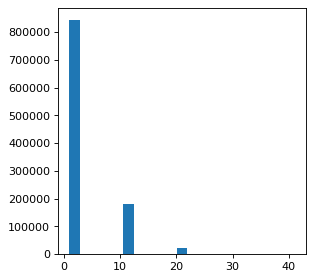

add noise


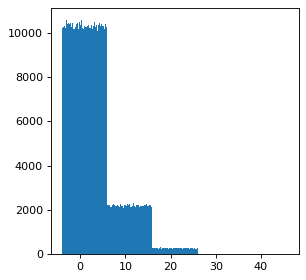

add scan


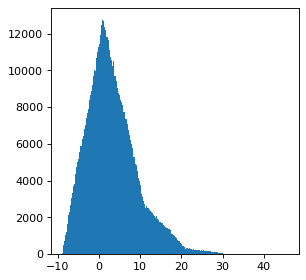

add slant


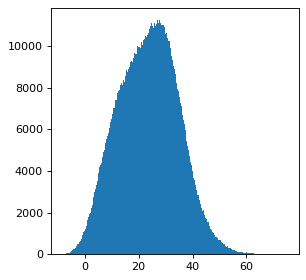

shape: (1024, 1024)


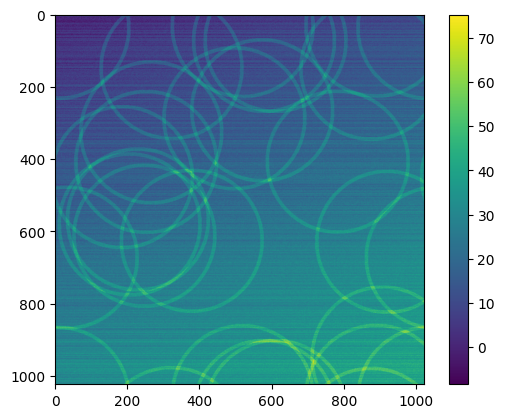

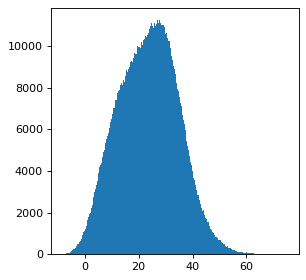

avg x left: 18.108128596165432
avg x right: 28.631287227485885
dx: 0.010286567577048341
avg y top: 9.595065168446034
avg y bot: 33.919874097495864
dy: 0.02377791684169094
mean: 0.9121487081870405 std_dev: 5.437065499523706
threshold: 4.718094557853635


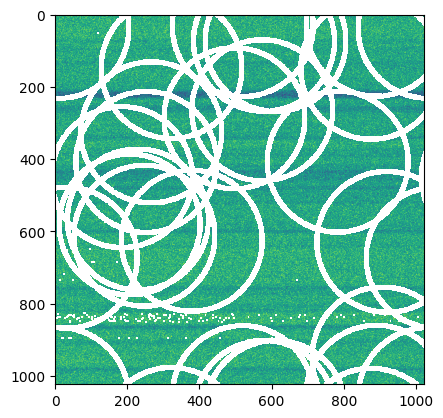

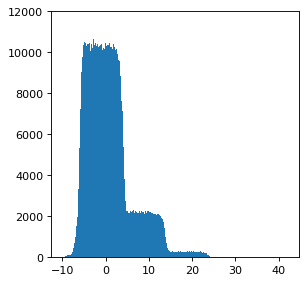

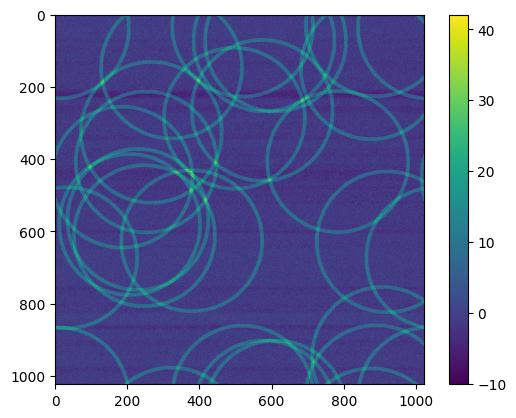

In [5]:
im_array = np.ones((1024, 1024), dtype=np.float64)
# im_array = np.array([[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]])
for i in range(20):
    im_array = add_ring(im_array, outer_size=200, inner_size=190, centre=(np.random.randint(0,im_array.shape[1]), np.random.randint(0, im_array.shape[0])))

plot_histogram(im_array)
print('add noise')
im_array = add_random_noise(im_array, magnitude=10)
plot_histogram(im_array)
print('add scan')
im_array = add_scan_lines(im_array)
plot_histogram(im_array)
print('add slant')
im_array = add_slant(im_array)
plot_histogram(im_array)

print(f'shape: {im_array.shape}')

plt.imshow(im_array)
plt.colorbar()
plt.show()

plot_histogram(im_array)

# im_array = median_differences_flattening(im_array)
im_array = remove_plane_tilt(im_array)
im_array = median_flattening(im_array)

masked_image = mask_image(im_array)
plt.imshow(masked_image)

plot_histogram(im_array)

plt.imshow(im_array)
plt.colorbar()

# TODO:
# measure the amount of noise and type of noise
# do image in subtracted by image out 